In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

df = pd.read_csv("WineQT.csv")
print("Original Data Head:\n", df.head())

Original Data Head:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8   

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data)
scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-0.815724,-1.735618
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,-0.815724,-1.733462
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,-0.815724,-1.731306
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,0.425784,-1.729150
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-0.815724,-1.726993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.151292,-0.118842,-0.703785,-0.171289,-0.231395,1.306316,-0.180503,-0.514707,0.695966,0.541862,0.515741,0.425784,1.696940
1139,-0.865059,0.493785,-0.958109,-0.466421,-0.400719,1.208717,-0.241539,-0.114545,0.695966,0.952843,-0.870937,0.425784,1.699096
1140,-1.208538,0.382399,-0.958109,-0.392638,0.064922,1.599113,-0.058432,-0.951246,0.887542,-0.456235,0.053515,-0.815724,1.701252
1141,-1.380278,0.103932,-0.856379,-0.245072,-0.527712,2.282306,0.155192,-0.836914,1.334554,0.600574,0.700632,0.425784,1.703408


In [26]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns=df.columns)
print(pca.explained_variance_ratio_)

print("\nExplained Variance (Eigen values):")
print(pca.explained_variance_)
print("\nPrincipal Axes (components/Eigen Vectors):")
print(pca.components_)
print("\nMean of each feature before transformation:")
print(pca.mean_)


[0.25192323 0.17625364 0.13093072 0.09354943 0.0744819  0.07123151
 0.04827287 0.04294517 0.0375559  0.03132014 0.0238955  0.01317823
 0.00446177]

Explained Variance (Eigen values):
[3.27786978 2.29330366 1.7035898  1.21720747 0.96911259 0.92682053
 0.62809684 0.55877605 0.4886542  0.40751834 0.31091351 0.17146701
 0.05805375]

Principal Axes (components/Eigen Vectors):
[[ 0.47750067 -0.22369614  0.44707047  0.16608228  0.21158396 -0.05584784
   0.01369381  0.39503221 -0.41520442  0.23669015 -0.1139593   0.07883684
  -0.20677085]
 [-0.03207913  0.38324503 -0.19392824  0.10924891  0.15183135  0.19774553
   0.31130712  0.29272457 -0.02396455 -0.16283452 -0.49875547 -0.49553927
  -0.19075973]
 [-0.14110177 -0.18501857  0.11730801  0.24849085  0.04397806  0.642225
   0.57703504 -0.13119569  0.02673612  0.2         0.16678464  0.14637357
   0.12579199]
 [-0.23229137  0.02661006 -0.02765048 -0.41600742  0.6435673  -0.04234129
  -0.04804604 -0.19681472 -0.01736526  0.53858969 -0.13774642 -0.

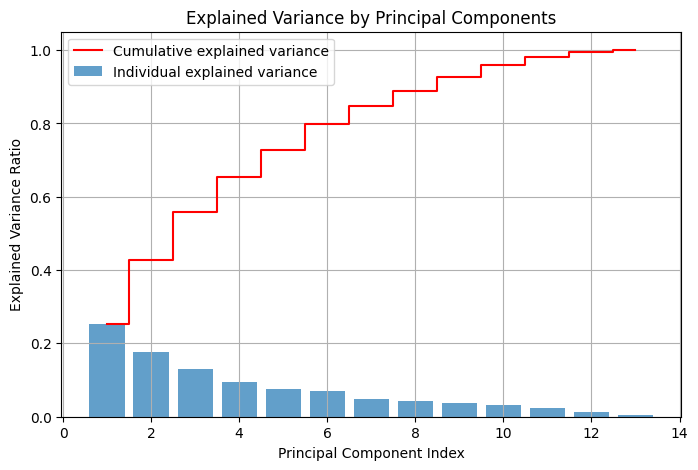

In [31]:
explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(8,5))
plt.bar(range(1, 14), explained_var, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, 14), np.cumsum(explained_var), where='mid', label='Cumulative explained variance', color='red')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid(True)
plt.show()

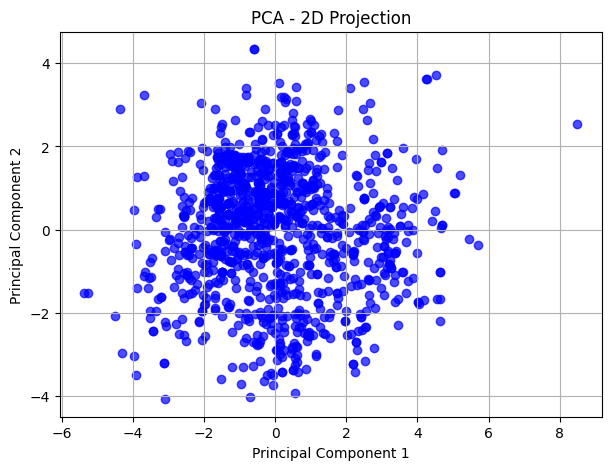

In [34]:
plt.figure(figsize=(7, 5))
plt.scatter(pca_df['fixed acidity'], pca_df['volatile acidity'], c='blue', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection')
plt.grid(True)
plt.show()

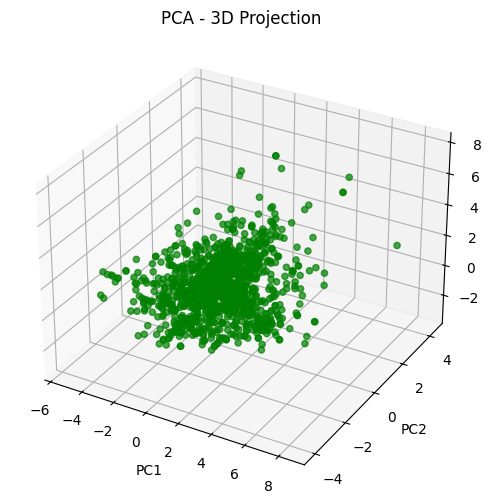

In [40]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['fixed acidity'], pca_df['volatile acidity'], pca_df['citric acid'], c='green', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - 3D Projection')
plt.show()

In [36]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')